In [1]:
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
import random as rnd 
plt.style.use('seaborn-dark-palette')
plt.rcParams.update({'font.size':12})
#np.random.seed(3435333422)
rnd.seed(945526237263)

In [2]:
import numpy as np 
def pdf_const_bin(x, bins):
    '''
    generate Probability distribution function corresponding 
    to given samples of random variables x 
    against bins 
    '''
    x = np.asarray(x)
    v_min = np.amin(x)
    v_max = np.amax(x)
    h = (v_max-v_min)/bins
    tot_length = len(x)
    #print(v_min , v_max)
    hist = []
    x_axis = []
    for i in range(bins):
        temp_min = v_min+i*h
        temp_max = v_min+(i+1)*h
        #print(temp_min, temp_max)
        temp = [x_val for x_val in x if ((x_val>temp_min) and(x_val<=temp_max))]
        #print(temp)
        count = (len(temp)/tot_length)/h
        hist.append(count)
        x_axis.append((temp_min+temp_max)/2)
    return(hist , x_axis)


def histogram(x,bins):

    def histogram_const_bin(x, bins):
        x = np.asarray(x)
        v_min = np.amin(x)
        v_max = np.amax(x)
        h = (v_max-v_min)/bins
            #print(v_min , v_max)
        hist = []
        x_axis = []
        for i in range(bins):
            temp_min = v_min+i*h
            temp_max = v_min+(i+1)*h
                #print(temp_min, temp_max)
            temp = [x_val for x_val in x if ((x_val>temp_min) and (x_val<=temp_max))] 
                #print(temp)
            count = len(temp)
            hist.append(count)
            x_axis.append((temp_min+temp_max)/2)
        return(hist , x_axis)

    def histogram_given_bin(x, bins):
        x = np.asarray(x)
        v_min = np.amin(x)
        v_max = np.amax(x)
        h = (v_max-v_min)/bins
            #print(v_min , v_max)
        hist = []
        x_axis = []
        for i in range(len(bins)):
            temp = [x_val for x_val in x if ((x_val>bins[i]) and (x_val<=bins[i+1]))] 
                #print(temp)
            count = len(temp)
            hist.append(count)
                #x_axis.append((temp_min+temp_max)/2)
        return(hist, bins)


    if(type(bins)==int):
        hist , bins = histogram_const_bin(x,bins)
    else:
        hist , bins = histogram_given_bin(x,bins)
    return(hist, bins)



In [3]:
def gen_rand_n(x_min ,x_max , n):
    #import random as rnd 
    x = []
    n = int(n)
    for i in range(n):
        mu = rnd.uniform(0,1)
        xi = x_min + mu*(x_max-x_min)
        x.append(xi)
    if (len(x)==1):
        return x[0]
    else:
        return x

def gen_samples(f,x_min , x_max , y_max , N):
    #import numpy as np 
    x_acc = []
    i = 0
    while(i<N):
        x = gen_rand_n(x_min,x_max,1)
        y = gen_rand_n(0,y_max , 1)
        if(y<=f(x)):
            x_acc.append(x)
            i+=1
    return x_acc

In [4]:
def pdf(lmd):
    def f(x):
        val = lmd*np.exp(-lmd*x)
        return val 
    return f

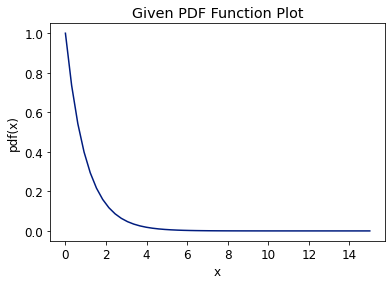

In [5]:
x= np.linspace(0,15)
plt.plot(x, pdf(1)(x))
plt.title('Given PDF Function Plot')
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.show()

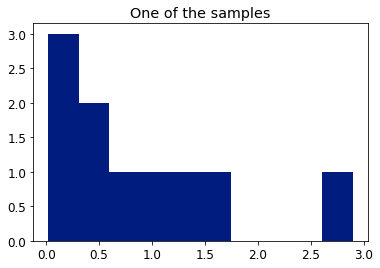

In [7]:

lmd = 1
y_max = lmd
samples = gen_samples(pdf(lmd) , 0,15 ,y_max ,10)
plt.hist(samples)
plt.title('One of the samples')
plt.show()

### Generating 1000 samples for n=10

In [8]:
N = 1000 
lmd = 1
samples = []
n = 10
for i in range(N):
    s = gen_samples(pdf(lmd) , 0,15 ,y_max , n)
    samples.append(s)

In [9]:
lmd_estim = []
for s in samples:
    lm =len(s)/sum(s)
    lmd_estim.append(lm)

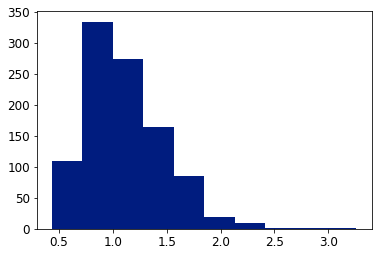

In [10]:
plt.hist(lmd_estim)
plt.show()

In [11]:
mean_lambda = sum(lmd_estim)/len(lmd_estim)
var_lmd = np.var(lmd_estim)
print("Mean of lambda:" , mean_lambda)
print("Variance of lambda:" , var_lmd)

Mean of lambda: 1.1120350720422472
Variance of lambda: 0.13490847277411472


In [14]:
means = []
n_val = [2,5,10,20,30, 100]
for n in n_val: 
    N = 1000 
    lmd = 1
    samples = []
    #means = []
    for i in range(N):
        s = gen_samples(pdf(lmd) , 0,15 ,y_max , n)
        samples.append(s)
    lmd_estim = []
    for s in samples:
        lm =len(s)/sum(s)
        lmd_estim.append(lm)
    mean_lambda = sum(lmd_estim)/len(lmd_estim)
    var_lmd = np.var(lmd_estim)
    means.append(mean_lambda)
    print("Mean of lambda:" , mean_lambda)
    print("Variance of lambda:" , var_lmd)

Mean of lambda: 1.9746627095915248
Variance of lambda: 11.79035739517205
Mean of lambda: 1.270983500702075
Variance of lambda: 0.618394896639348
Mean of lambda: 1.1067183612399643
Variance of lambda: 0.16827395165764694
Mean of lambda: 1.0500933285008456
Variance of lambda: 0.059863305373945117
Mean of lambda: 1.0294277630955584
Variance of lambda: 0.036473897562855635
Mean of lambda: 1.0146121526957346
Variance of lambda: 0.009553155711169412


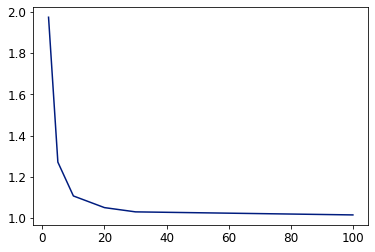

In [15]:
plt.plot(n_val , means)
plt.show()